<a href="https://colab.research.google.com/github/ivalexander13/mrsa-nisin-resistance/blob/master/MRSA_Nisin_Resistance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup

## Introduction

**Paper:** Acquired Nisin Resistance in Staphylococcus aureus Involves Constitutive Activation of an Intrinsic Peptide Antibiotic Detoxification Module ([paper](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6291627), [data](https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE114706)).

The goal of this project is to analyse RNASeq data in order to identify differentially expressed genes between wild type and Nisin-resistant strains of *Staphylococcus aureus*.

## Background

Nisin is a broad-spectrum antibiotic effective against many Gram Positive bacteria. It kills susceptible microbes by creating pores on bacterial membranes and preventing cell wall synthesis. 

In this study, Nisin resistance in *S. aureus* was triggered by mutating the *nsaS* gene, which codes for a set of proteins called NsaRS. NsaRS is a two-component regulatory system that detects the presence of nisin and subsequently triggers changes in transcription that will be reflected by our analyses of the transcriptome.

In [0]:
import numpy as np
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import scipy.stats as stats
plt.style.use('fivethirtyeight')
import pandas as pd
import seaborn as sns
import sklearn
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

## Data Cleanup
There are five samples in total, with two (samples 1 and 2) being wild-type strains and three (samples 3, 4, and 5). Each sample has 4 columns: features, expression value, unique reads, and total reads. For our analyses, we will only use the last column.

In [0]:
raw1 = pd.read_csv("https://raw.githubusercontent.com/ivalexander13/mrsa-nisin-resistance/master/samples_raw/GSM3147945_WT1_S7.txt", delimiter = "\t")
raw2 = pd.read_csv("https://raw.githubusercontent.com/ivalexander13/mrsa-nisin-resistance/master/samples_raw/GSM3147946_WT3_S9.txt", delimiter = "\t")
raw3 = pd.read_csv("https://raw.githubusercontent.com/ivalexander13/mrsa-nisin-resistance/master/samples_raw/GSM3147947_SM1_S4.txt", delimiter = "\t")
raw4 = pd.read_csv("https://raw.githubusercontent.com/ivalexander13/mrsa-nisin-resistance/master/samples_raw/GSM3147948_SM2_S5.txt", delimiter = "\t")
raw5 = pd.read_csv("https://raw.githubusercontent.com/ivalexander13/mrsa-nisin-resistance/master/samples_raw/GSM3147949_SM3_S6.txt", delimiter = "\t")


# function for data preprocessing 

def preproc(*dfs):
  list_df = []
  for df in dfs:
    df.drop(df.columns[[1, 2]], axis=1, inplace=True)
    df = df.rename({df.columns[0]: "feature", df.columns[1]: "reads_" + str(len(list_df) + 1)}, axis='columns')
    list_df.append(df)
  return list_df

raw1, raw2, raw3, raw4, raw5 = preproc(raw1, raw2, raw3, raw4, raw5)


# combine the five samples into one dataframe

raws = pd.merge(raw1, raw2,  on='feature')
raws = pd.merge(raws, raw3, on='feature')
raws = pd.merge(raws, raw4, on='feature')
raws = pd.merge(raws, raw5, on='feature')


In [31]:

raws

,feature,reads_1,reads_2,reads_3,reads_4,reads_5
0,SAOUHSC_01037,10,180,6,10,4
1,SAOUHSC_00303,4,3,1,1,0
2,SAOUHSC_00978,94,257,24,62,23
3,SAOUHSC_02313,3,6,1,1,1
4,SAOUHSC_02518,6,9,0,4,1
...,...,...,...,...,...,...
2867,SAOUHSC_02939,0,0,1,1,0
2868,SAOUHSC_02948,0,5,0,0,0
2869,SAOUHSC_02950,1,1,0,0,0
2870,SAOUHSC_A01436,0,0,0,1,0


## Exploratory Data Analysis
A histogram of the raw values show a significant majority of features not being expressed. A histogram of the log of the raw values tell a different story.

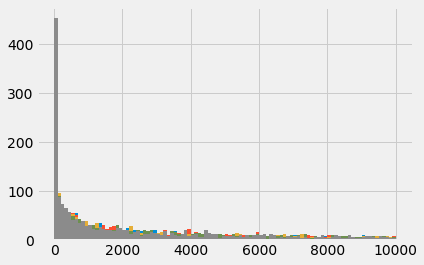

In [104]:
histrange = [0, 10000]
raws.iloc[:, 1].hist(bins=100, range=histrange)
raws.iloc[:, 2].hist(bins=100, range=histrange)
raws.iloc[:, 3].hist(bins=100, range=histrange)
raws.iloc[:, 4].hist(bins=100, range=histrange)
raws.iloc[:, 5].hist(bins=100, range=histrange)
plt.show()

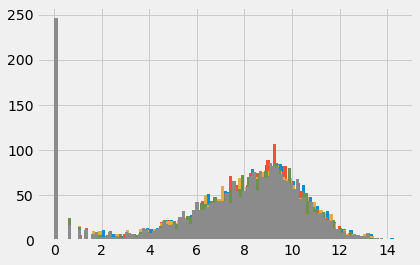

In [105]:
np.log(raws.iloc[:, 1] + 1).hist(bins=100)
np.log(raws.iloc[:, 2] + 1).hist(bins=100)
np.log(raws.iloc[:, 3] + 1).hist(bins=100)
np.log(raws.iloc[:, 4] + 1).hist(bins=100)
np.log(raws.iloc[:, 5] + 1).hist(bins=100)
plt.show()